<a href="https://colab.research.google.com/github/m-riddle-codes/ARA/blob/main/002_pd1pdl1_lipinski_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
In this Google Colab Notebook, we will conduct a comprehensive analysis focusing exclusively on Lipinski's Rule of Five, a rule of thumb to evaluate the drug-likeness of a chemical compound. Developed by Christopher A. Lipinski in 1997, this rule states that a molecule is likely to be absorbed or permeated well in the body (and therefore be an effective drug) if it does not violate more than one of the following criteria:

Molecular Weight: Less than 500 daltons
Octanol-Water Partition Coefficient (LogP): Less than 5
Number of Hydrogen Bond Donors: Less than 5
Number of Hydrogen Bond Acceptors: Less than 10
These criteria are based on the observation that most orally active drugs on the market exhibit these properties. The implication of this rule is significant in pharmaceutical and medicinal chemistry for the rapid identification and evaluation of potential drug candidates. It helps in filtering out compounds that are less likely to be orally active, thus focusing resources and efforts on those with higher potential.


---



# Learning Objectives
* Understand Lipinski's Rule of Five: Learn the criteria and their implications in evaluating the drug-likeness of chemical compounds.
* Analyze Chemical Compounds: Use Python and RDKit to analyze the properties of chemical compounds.
* Visualize Data: Create visual representations to better understand and communicate the analysis results.

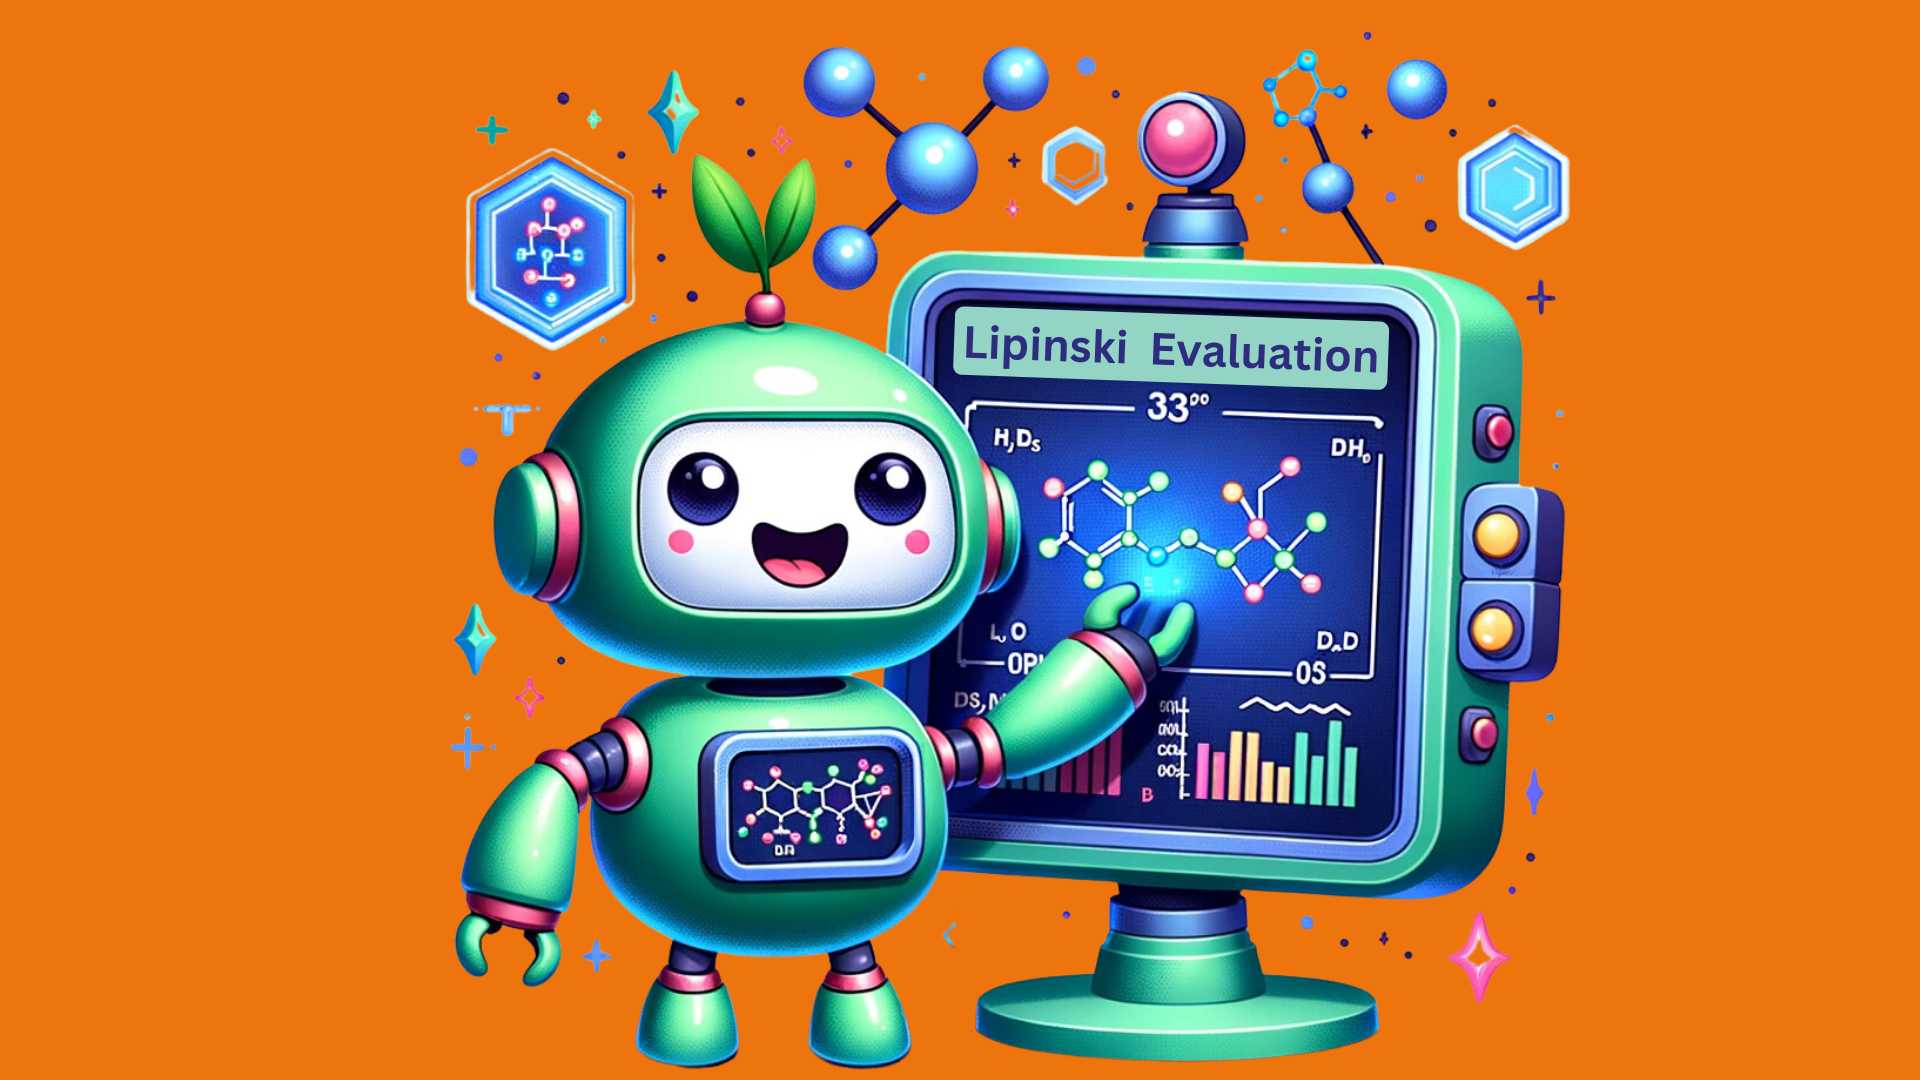

In [ ]:
# @title Default title text
from IPython.display import Image
Image(filename='lipinski.png')


We install RDKit first to process and analyze chemical information data.

# Sample Molecule Data
We have a collection of molecules represented in SMILES notation. We'll convert these into a more analyzable format and calculate essential properties to evaluate them against Lipinski's Rule of Five.

In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 75.7 MB/s eta 0:00:00


1. **import math**:
Provides mathematical operations and functions.
2. **import numpy as np**:
Handles numerical operations on arrays and matrices.
3. **import pandas as pd**:
Used for data handling and analysis with DataFrames.
4. **import matplotlib.pyplot as plt**:
For creating a variety of visualizations.
5. **from matplotlib.lines import Line2D**:
Creates 2D line objects on plots.
6. **import matplotlib.patches as mpatches**:
Allows drawing shapes and annotations on plots.
7. **from rdkit import Chem**:
Tools for chemical informatics and molecular structure handling.
8. **from rdkit.Chem import Descriptors, Draw, PandasTools**:
Computes chemical descriptors, draws molecular structures, and integrates RDKit with Pandas for easier data handling.

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

In [ ]:
smiles = [
    "CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(C(=O)NC(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N(C(C(=O)N1)C(C(C)CC=CC)O)C)C(C)C)C)CC(C)C)C)CC(C)C)C)C)C)CC(C)C)C)C(C)C)CC(C)C)C)C",
    "CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C",
    "CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=C(C)C=CC2=C(CCCC2(C)C)C)C)C",
    "CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O",
]
names = ["cyclosporine", "clozapine", "beta-carotene", "cannabidiol"]

,name,smiles,ROMol
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C,
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...,
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,

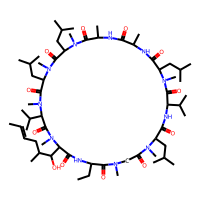
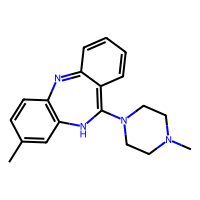
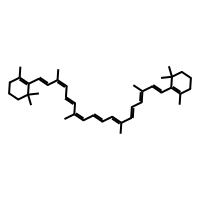
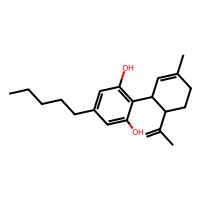

In [ ]:
molecules = pd.DataFrame({"name": names, "smiles": smiles})
PandasTools.AddMoleculeColumnToFrame(molecules, "smiles")
molecules

We then calculate various molecular descriptors like molecular weight, number of hydrogen bond acceptors and donors, and logP value for each molecule.

In [ ]:
molecules["molecular_weight"] = molecules["ROMol"].apply(Descriptors.ExactMolWt)
molecules["n_hba"] = molecules["ROMol"].apply(Descriptors.NumHAcceptors)
molecules["n_hbd"] = molecules["ROMol"].apply(Descriptors.NumHDonors)
molecules["logp"] = molecules["ROMol"].apply(Descriptors.MolLogP)
# Colors are used for plotting the molecules later
molecules["color"] = ["red", "green", "blue", "cyan"]
# NBVAL_CHECK_OUTPUT
molecules[["molecular_weight", "n_hba", "n_hbd", "logp"]]

,molecular_weight,n_hba,n_hbd,logp
0,1201.841368,12,5,3.26900
1,306.184447,4,1,1.68492
2,536.438202,0,0,12.60580
3,314.224580,2,2,5.84650


,name,smiles,ROMol,molecular_weight,n_hba,n_hbd,logp,color
0,cyclosporine,CCC1C(=O)N(CC(=O)N(C(C(=O)NC(C(=O)N(C(C(=O)NC(...,,1201.841368,12,5,3.26900,red
1,clozapine,CN1CCN(CC1)C2=C3C=CC=CC3=NC4=C(N2)C=C(C=C4)C,,306.184447,4,1,1.68492,green
2,beta-carotene,CC1=C(C(CCC1)(C)C)C=CC(=CC=CC(=CC=CC=C(C)C=CC=...,,536.438202,0,0,12.60580,blue
3,cannabidiol,CCCCCC1=CC(=C(C(=C1)O)C2C=C(CCC2C(=C)C)C)O,,314.224580,2,2,5.84650,cyan

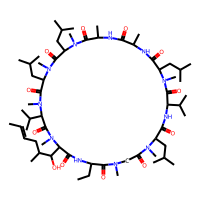
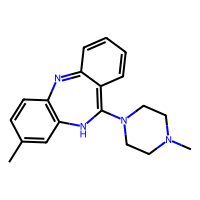
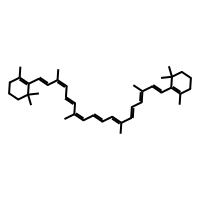
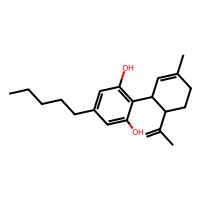

In [ ]:
# Full preview
molecules

Now, we create a bar plot for each of the four properties defined in the ro5_properties dictionary (molecular weight, number of hydrogen bond acceptors, number of hydrogen bond donors, and logP).

Each bar plot visualizes the values of these properties for different molecules, with a dashed line indicating the threshold value for each property according to Lipinski's rule of five. The plots are color-coded, and a legend is added to identify each molecule and the threshold lines.

In [ ]:
ro5_properties = {
    "molecular_weight": (500, "molecular weight (Da)"),
    "n_hba": (10, "# HBA"),
    "n_hbd": (5, "# HBD"),
    "logp": (5, "logP"),
}

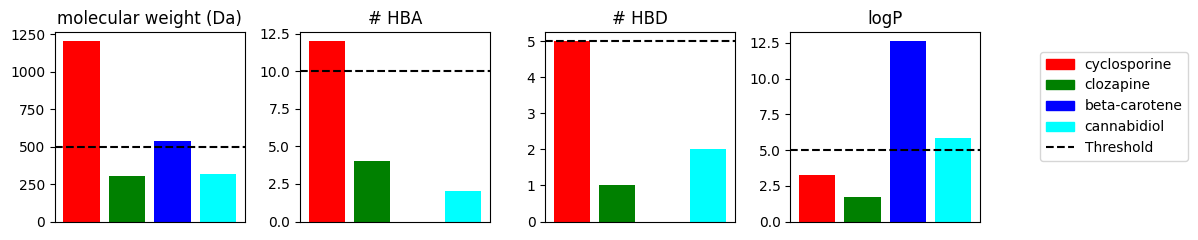

In [ ]:
# Start 1x4 plot frame
fig, axes = plt.subplots(figsize=(10, 2.5), nrows=1, ncols=4)
x = np.arange(1, len(molecules) + 1)
colors = ["red", "green", "blue", "cyan"]

# Create subplots
for index, (key, (threshold, title)) in enumerate(ro5_properties.items()):
    axes[index].bar([1, 2, 3, 4], molecules[key], color=colors)
    axes[index].axhline(y=threshold, color="black", linestyle="dashed")
    axes[index].set_title(title)
    axes[index].set_xticks([])

# Add legend
legend_elements = [
    mpatches.Patch(color=row["color"], label=row["name"]) for index, row in molecules.iterrows()
]
legend_elements.append(Line2D([0], [0], color="black", ls="dashed", label="Threshold"))
fig.legend(handles=legend_elements, bbox_to_anchor=(1.2, 0.8))

# Fit subplots and legend into figure
plt.tight_layout()
plt.show()

A function named calculate_ro5_properties is defined to evaluate whether a given molecule, represented by its SMILES string, complies with Lipinski's rule of five. It calculates the molecular weight, number of hydrogen bond acceptors, number of hydrogen bond donors, and logP value for the molecule.

It then checks if these values meet the criteria of the rule of five (Yay! No more doing this manually).

The function returns these calculated properties along with a boolean value indicating whether the molecule satisfies at least three out of the four criteria.

The function is then applied to each molecule in the molecules DataFrame, and the compliance with the rule of five for each molecule is printed to the console.

In [ ]:
def calculate_ro5_properties(smiles):
    """
    Test if input molecule (SMILES) fulfills Lipinski's rule of five.

    Parameters
    ----------
    smiles : str
        SMILES for a molecule.

    Returns
    -------
    pandas.Series
        Molecular weight, number of hydrogen bond acceptors/donor and logP value
        and Lipinski's rule of five compliance for input molecule.
    """
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # Check if Ro5 conditions fulfilled
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"],
    )

In [ ]:
for name, smiles in zip(molecules["name"], molecules["smiles"]):
    print(f"Ro5 fulfilled for {name}: {calculate_ro5_properties(smiles)['ro5_fulfilled']}")

Ro5 fulfilled for cyclosporine: False
Ro5 fulfilled for clozapine: True
Ro5 fulfilled for beta-carotene: False
Ro5 fulfilled for cannabidiol: True


In this part, we are loading a dataset from a previously saved CSV file named "pd1pdl1_complex_compounds.csv". This file contains molecular data that we intend to evaluate against Lipinski's Rule of Five.

The pd.read_csv() function is used to read the data from the CSV file and store it in a DataFrame named molecules. We then print the shape of the DataFrame to check the number of rows and columns it contains, and use head() to display the first few rows of the dataset, giving a snapshot of the data we'll be working with.

We can easily adapt this code to analyze a different dataset by replacing the filename in the pd.read_csv() function with the name of our specific file. Ensure the file path and name match exactly to successfully load our data.

For example:

# molecules = pd.read_csv("our_file_name_here.csv")

Replace "our_file_name_here.csv" with the actual name of our file. Ensure the file is in the same directory as our notebook or provide the correct path to the file.

In [ ]:
molecules = pd.read_csv("pd1pdl1_complex_compounds.csv")
print(molecules.shape)
molecules.head()

(570, 5)


,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL4529967,0.00008,nM,N#Cc1cc(COc2cc(CCc3cccc(-c4ccccc4)c3Br)c(Cl)cc...,13.096910
1,CHEMBL5202283,0.00008,nM,N#Cc1cc(COc2cc(CCc3cccc(-c4ccccc4)c3Br)ccc2CN2...,13.096910
2,CHEMBL5182195,0.04000,nM,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN[C@H](CCO)C(=O...,10.397940
3,CHEMBL4865838,0.05100,nM,CS(=O)(=O)c1cncc(COc2nc(O[C@H]3CCc4c(-c5cccc6c...,10.292430
4,CHEMBL4862360,0.05800,nM,C[C@@](CO)(NCc1cc(Cl)c(O[C@H]2CCc3c(-c4cccc5c4...,10.236572


In [ ]:
# This takes a couple of seconds
ro5_properties = molecules["smiles"].apply(calculate_ro5_properties)
ro5_properties.head()

,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,643.123732,5,1,7.83948,False
1,609.162704,5,1,7.18608,False
2,948.290399,12,6,8.40190,False
3,1144.251648,18,4,6.37760,False
4,1120.251648,18,6,6.18840,False


In [ ]:
molecules = pd.concat([molecules, ro5_properties], axis=1)
molecules.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,CHEMBL4529967,0.00008,nM,N#Cc1cc(COc2cc(CCc3cccc(-c4ccccc4)c3Br)c(Cl)cc...,13.096910,643.123732,5,1,7.83948,False
1,CHEMBL5202283,0.00008,nM,N#Cc1cc(COc2cc(CCc3cccc(-c4ccccc4)c3Br)ccc2CN2...,13.096910,609.162704,5,1,7.18608,False
2,CHEMBL5182195,0.04000,nM,Cc1c(COc2cc(OCc3cccc(C#N)c3)c(CN[C@H](CCO)C(=O...,10.397940,948.290399,12,6,8.40190,False
3,CHEMBL4865838,0.05100,nM,CS(=O)(=O)c1cncc(COc2nc(O[C@H]3CCc4c(-c5cccc6c...,10.292430,1144.251648,18,4,6.37760,False
4,CHEMBL4862360,0.05800,nM,C[C@@](CO)(NCc1cc(Cl)c(O[C@H]2CCc3c(-c4cccc5c4...,10.236572,1120.251648,18,6,6.18840,False


In [ ]:
molecules.shape

(570, 10)

Download the dataframe by running the following cells

In [ ]:
molecules.to_csv("molecules.csv")

In [ ]:
from google.colab import files
files.download('molecules.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now, we will count how many are compliant and how many of the compounds committed violations

In [ ]:
# Note that the column "ro5_fulfilled" contains boolean values.
# Thus, we can use the column values directly to subset data.
# Note that ~ negates boolean values.
molecules_ro5_fulfilled = molecules[molecules["ro5_fulfilled"]]
molecules_ro5_violated = molecules[~molecules["ro5_fulfilled"]]

print(f"# compounds in unfiltered data set: {molecules.shape[0]}")
print(f"# compounds in filtered data set: {molecules_ro5_fulfilled.shape[0]}")
print(f"# compounds not compliant with the Ro5: {molecules_ro5_violated.shape[0]}")

# compounds in unfiltered data set: 570
# compounds in filtered data set: 305
# compounds not compliant with the Ro5: 265


Let's then view the top 30 molecules with the highest pIC50 values from the molecules DataFrame. It then sorts these 30 molecules in descending order to easily identify the molecules with the highest pIC50 values and prints out their ChEMBL IDs alongside their pIC50 values.

In [ ]:
# Get the top 30 rows based on pIC50 values
top_30 = molecules.nlargest(30, 'pIC50')

# Sort the top 30 rows in descending order of pIC50 values (optional, if you want to display them sorted)
top_30 = top_30.sort_values(by='pIC50', ascending=False)

# Print the top 30 values with molecule ChEMBL ID
print("Top 30 pIC50 Values with Molecule ChEMBL ID:")
print(top_30[['molecule_chembl_id', 'pIC50']])


Top 30 pIC50 Values with Molecule ChEMBL ID:
   molecule_chembl_id      pIC50
0       CHEMBL4529967  13.096910
1       CHEMBL5202283  13.096910
2       CHEMBL5182195  10.397940
3       CHEMBL4865838  10.292430
4       CHEMBL4862360  10.236572
5       CHEMBL5196746   9.318759
6       CHEMBL4636767   9.301030
7       CHEMBL4869408   9.086186
8       CHEMBL4092122   9.036212
9       CHEMBL4441950   9.036212
10      CHEMBL5180975   8.829738
11      CHEMBL5201066   8.804100
12      CHEMBL5092744   8.744727
13      CHEMBL4865534   8.684030
14      CHEMBL4436703   8.657577
15      CHEMBL5176735   8.647817
16      CHEMBL4084368   8.633577
17      CHEMBL4516321   8.602060
18      CHEMBL5081629   8.585027
19      CHEMBL5077644   8.568636
20      CHEMBL4870536   8.524329
21      CHEMBL4575618   8.522879
22      CHEMBL5086579   8.481486
23      CHEMBL5081208   8.455932
24      CHEMBL5075026   8.444906
25      CHEMBL4071326   8.441978
26      CHEMBL4528795   8.420216
27      CHEMBL5093206   8.42021

Now, we visualize

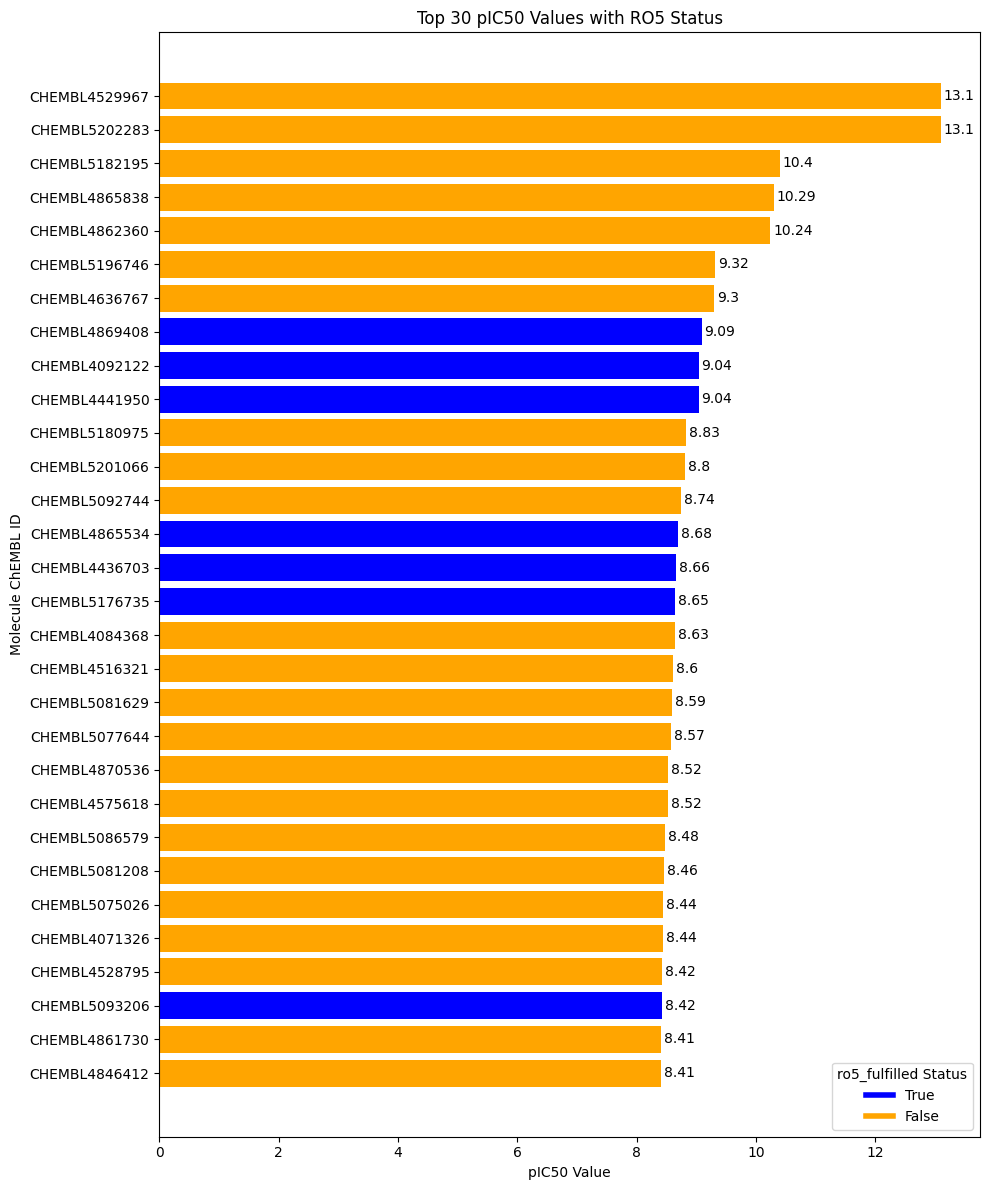

In [ ]:
# Get the top 30 rows based on pIC50 values
top_30 = molecules.nlargest(30, 'pIC50')

# Sort the top 30 rows in ascending order of pIC50 values
top_30 = top_30.sort_values(by='pIC50', ascending=True)

# Determine the colors for the bars based on the ro5_fulfilled status
colors = ['blue' if fulfilled else 'orange' for fulfilled in top_30['ro5_fulfilled']]

# Plot the top 30 pIC50 values using horizontal bars
plt.figure(figsize=(10, 12))
bars = plt.barh(top_30['molecule_chembl_id'], top_30['pIC50'], color=colors)

# Customize the plot
plt.ylabel('Molecule ChEMBL ID')
plt.xlabel('pIC50 Value')
plt.title('Top 30 pIC50 Values with RO5 Status')

# Annotate bars with their pIC50 values on the right
for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.05, bar.get_y() + bar.get_height()/2, round(xval, 2), ha='left', va='center')

# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='blue', lw=4, label='True'),
                   Line2D([0], [0], color='orange', lw=4, label='False')]
plt.legend(handles=legend_elements, title='ro5_fulfilled Status', loc='lower right')

plt.tight_layout()
plt.show()


Now we visualize how many are compliant and how many had violations.

In [ ]:
counts = molecules['ro5_fulfilled'].value_counts()

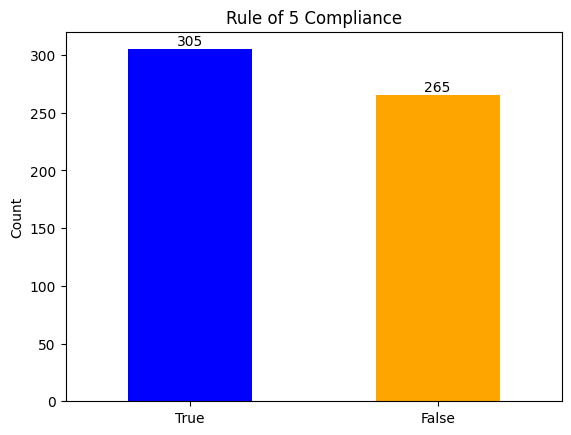

In [ ]:
colors = ['blue' if label == True else 'orange' for label in counts.index]
ax = counts.plot(kind='bar', color=colors)

plt.title('Rule of 5 Compliance')
plt.ylabel('Count')

# Customize x-axis tick labels
plt.xticks(ticks=[0, 1], labels=["True", "False"], rotation=0)

# Annotate bars with their counts
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 6),
                textcoords='offset points')

plt.show()

If you like to conduct further analysis using those compounds which are only compliant, you may download the dataset.

In [ ]:
# Save filtered data
molecules_ro5_fulfilled.to_csv("pd1_pdl1_compounds_lipinski.csv")
molecules_ro5_fulfilled.head()

In [ ]:
molecules_ro5_fulfilled.shape

(305, 10)

Now we generate radar plots to view what properties were the most common reason for the violations

In [ ]:
molecules_ro5_fulfilled_stats = calculate_mean_std(
    molecules_ro5_fulfilled[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_ro5_fulfilled_stats

,mean,std
molecular_weight,446.455217,71.503129
n_hba,5.744262,1.658364
n_hbd,2.304918,1.046049
logp,4.163209,1.038349


In [ ]:
molecules_ro5_violated_stats = calculate_mean_std(
    molecules_ro5_violated[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_ro5_violated_stats

,mean,std
molecular_weight,684.062604,209.124851
n_hba,8.381132,3.091108
n_hbd,3.271698,3.600525
logp,5.896290,2.049420


In [ ]:
def _scale_by_thresholds(stats, thresholds, scaled_threshold):
    """
    Scale values for different properties that have each an individually defined threshold.

    Parameters
    ----------
    stats : pd.DataFrame
        Dataframe with "mean" and "std" (columns) for each physicochemical property (rows).
    thresholds : dict of str: int
        Thresholds defined for each property.
    scaled_threshold : int or float
        Scaled thresholds across all properties.

    Returns
    -------
    pd.DataFrame
        DataFrame with scaled means and standard deviations for each physiochemical property.
    """
    # Raise error if scaling keys and data_stats indicies are not matching
    for property_name in stats.index:
        if property_name not in thresholds.keys():
            raise KeyError(f"Add property '{property_name}' to scaling variable.")
    # Scale property data
    stats_scaled = stats.apply(lambda x: x / thresholds[x.name] * scaled_threshold, axis=1)
    return stats_scaled

In [ ]:
def _define_radial_axes_angles(n_axes):
    """Define angles (radians) for radial (x-)axes depending on the number of axes."""
    x_angles = [i / float(n_axes) * 2 * math.pi for i in range(n_axes)]
    x_angles += x_angles[:1]
    return x_angles

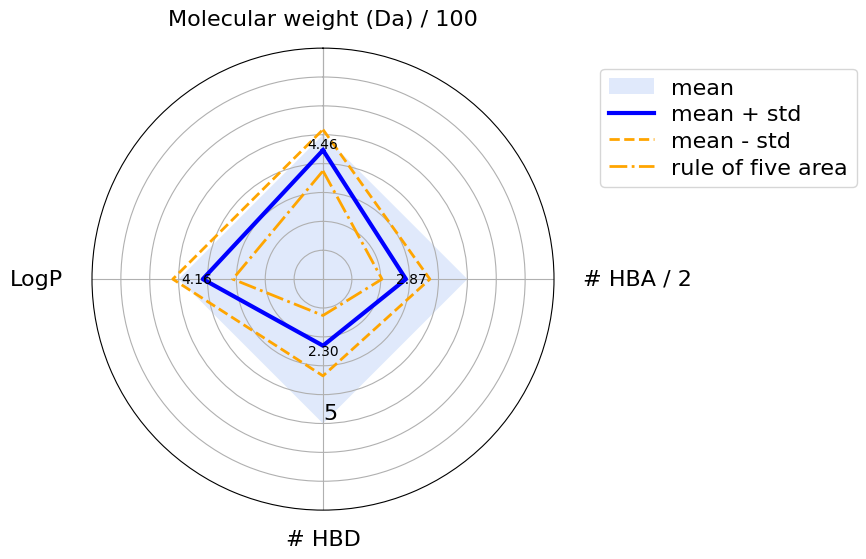

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import math

def calculate_mean_std(dataframe):
    """
    Calculate the mean and standard deviation of a dataset.
    """
    stats = dataframe.describe()
    stats = stats.T
    stats = stats[["mean", "std"]]
    return stats

def _scale_by_thresholds(stats, thresholds, scaled_threshold):
    """
    Scale values for different properties that have each an individually defined threshold.
    """
    for property_name in stats.index:
        if property_name not in thresholds.keys():
            raise KeyError(f"Add property '{property_name}' to scaling variable.")
    stats_scaled = stats.apply(lambda x: x / thresholds[x.name] * scaled_threshold, axis=1)
    return stats_scaled

def _define_radial_axes_angles(n_axes):
    """Define angles (radians) for radial (x-)axes depending on the number of axes."""
    x_angles = [i / float(n_axes) * 2 * math.pi for i in range(n_axes)]
    x_angles += x_angles[:1]
    return x_angles

def plot_radar(
    y,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max=None,
    output_path=None,
):
    x = _define_radial_axes_angles(len(y))
    y = _scale_by_thresholds(y, thresholds, scaled_threshold)
    y = pd.concat([y, y.head(1)])

    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    ax.fill(x, [scaled_threshold] * len(x), "cornflowerblue", alpha=0.2)
    ax.plot(x, y["mean"], "b", lw=3, ls="-")
    ax.plot(x, y["mean"] + y["std"], "orange", lw=2, ls="--")
    ax.plot(x, y["mean"] - y["std"], "orange", lw=2, ls="-.")

    # Display the actual mean values on the radar plot
    for i, angle in enumerate(x[:-1]):
        ax.text(angle, y["mean"].iloc[i] + 0.2, f"{y['mean'].iloc[i]:.2f}", size=10, ha="center", va="center")

    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(180)
    plt.xticks(x, [])
    if not y_max:
        y_max = int(ax.get_yticks()[-1])
    plt.ylim(0, y_max)
    plt.yticks(
        range(1, y_max),
        ["5" if i == scaled_threshold else "" for i in range(1, y_max)],
        fontsize=16,
    )

    for i, (angle, label) in enumerate(zip(x[:-1], properties_labels)):
        if angle == 0:
            ha = "center"
        elif 0 < angle < math.pi:
            ha = "left"
        elif angle == math.pi:
            ha = "center"
        else:
            ha = "right"
        ax.text(
            x=angle,
            y=y_max + 1,
            s=label,
            size=16,
            horizontalalignment=ha,
            verticalalignment="center",
        )

    labels = ("mean", "mean + std", "mean - std", "rule of five area")
    ax.legend(labels, loc=(1.1, 0.7), labelspacing=0.3, fontsize=16)

    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

    plt.show()

thresholds = {"molecular_weight": 500, "n_hba": 10, "n_hbd": 5, "logp": 5}
scaled_threshold = 5
properties_labels = [
    "Molecular weight (Da) / 100",
    "# HBA / 2",
    "# HBD",
    "LogP",
]
y_max = 8

plot_radar(
    molecules_ro5_fulfilled_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)



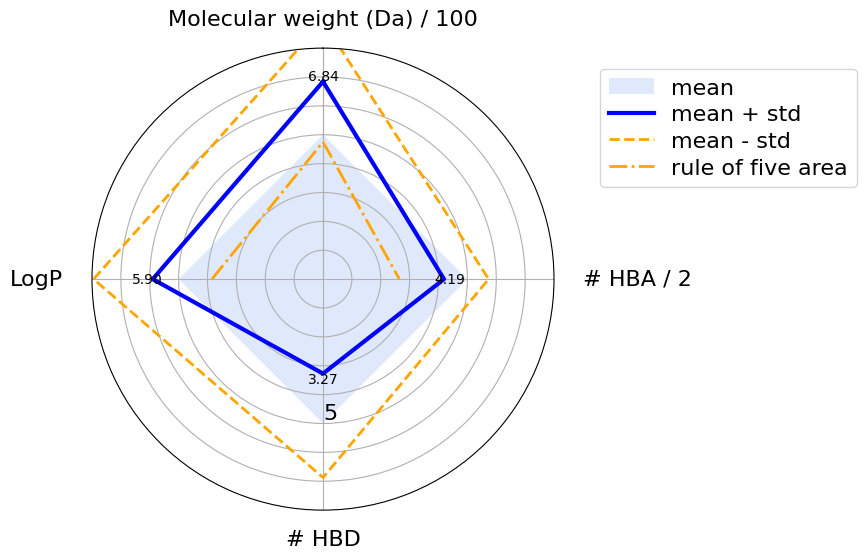

In [ ]:
plot_radar(
    molecules_ro5_violated_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)
